In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Feed Forward
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z # returning Z here as it is required to calculate the gradient

# Determining the classification Rate
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct/n_total)

# Defining the costs function
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

Defining the derivative functions

In [24]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    # Slow method
#     ret1 = np.zeros((M, K))
#     for n in range(N):
#         for m in range(M):
#             for k in range(K):
#                 ret1[m, k] += (T[n,k] - Y[n, k]) * Z[n, m]
#     return ret1

    # instead, let numpy do the work
#     ret2 = np.zeros((M, K))
#     for n in range(N):
#         for k in range(K): # eliminating the iteration through m with :
#             ret2[:, k] += (T[n, k] - Y[n, k] * Z[n, :])
#     return ret2

    # Even the above can be optimized further by letting numpy do it
#     ret3 = np.zeros((M, K))
#     for n in range(N):
#         ret3 += np.outer(Z[n], T[n]-Y[n])
#     return ret3
    
    # Now for the master optimization with numpy to save much time
    # just do this
    return Z.T.dot(T-Y) # Ztranspose . [T-Y] ## HOLY CRAP!!!

def derivative_b2(T, Y):
    return (T-Y).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape
    # slow method
#     ret1 = np.zeros((D, M))
#     for n in range(N):
#         for k in range(K):
#             for m in range(M):
#                 for d in range(D):
#                     ret1[d,m] += (T[n,k] - Y[n,k]) *W2[m, k] * Z[n,m] * (1-Z[n,m]*X[n,d])
#     return ret1
    # Optimizing
    dZ = (T-Y).dot(W2.T) * Z * (1-Z) # delta Z
    return X.T.dot(dZ)

def derivative_b1(T, Y, W2, Z):
    return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)

Lets create the data

In [18]:
Nclass = 500
D = 2
M = 3
K = 3

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
T = np.zeros((N, K))

for i in range(N):
    T[i, Y[i]] = 1 # One hot encoding for the targets

Visualizing the data

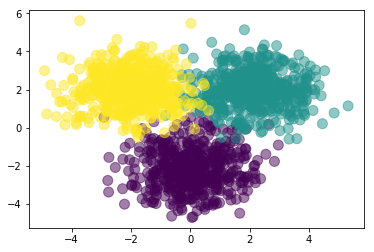

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=100, alpha=0.5)
plt.show()

Cost = -3207.56073574948 and classification rate is 0.23466666666666666
Cost = -3021.1541774089865 and classification rate is 0.21933333333333332
Cost = -2851.5315898419203 and classification rate is 0.20933333333333334
Cost = -2698.15341101776 and classification rate is 0.20066666666666666
Cost = -2559.80087657065 and classification rate is 0.198
Cost = -2434.9609103334587 and classification rate is 0.20066666666666666
Cost = -2322.099410286526 and classification rate is 0.204
Cost = -2219.803482800001 and classification rate is 0.21
Cost = -2126.8306480042374 and classification rate is 0.21533333333333332
Cost = -2042.1082254335406 and classification rate is 0.22133333333333333
Cost = -1964.7125076737705 and classification rate is 0.236
Cost = -1893.8435243557685 and classification rate is 0.278
Cost = -1828.8022498442047 and classification rate is 0.33866666666666667
Cost = -1768.9724273835218 and classification rate is 0.396
Cost = -1713.807088385211 and classification rate is 0.45

Cost = -496.0015072436337 and classification rate is 0.96
Cost = -492.597840084067 and classification rate is 0.96
Cost = -489.24134516021064 and classification rate is 0.9606666666666667
Cost = -485.931271580065 and classification rate is 0.9606666666666667
Cost = -482.6668780933022 and classification rate is 0.9606666666666667
Cost = -479.4474331552035 and classification rate is 0.9606666666666667
Cost = -476.2722149786106 and classification rate is 0.9606666666666667
Cost = -473.1405115743587 and classification rate is 0.9606666666666667
Cost = -470.0516207806683 and classification rate is 0.9613333333333334
Cost = -467.0048502819802 and classification rate is 0.9613333333333334
Cost = -463.9995176177147 and classification rate is 0.9613333333333334
Cost = -461.03495018143553 and classification rate is 0.962
Cost = -458.110485210903 and classification rate is 0.962
Cost = -455.2254697694825 and classification rate is 0.9626666666666667
Cost = -452.3792607193808 and classification ra

Cost = -281.57916105143715 and classification rate is 0.966
Cost = -280.72739705197284 and classification rate is 0.966
Cost = -279.883106899496 and classification rate is 0.966
Cost = -279.0461970564808 and classification rate is 0.966
Cost = -278.21657546904345 and classification rate is 0.9666666666666667
Cost = -277.3941515392711 and classification rate is 0.9666666666666667
Cost = -276.57883609812427 and classification rate is 0.9666666666666667
Cost = -275.7705413788942 and classification rate is 0.9666666666666667
Cost = -274.96918099120677 and classification rate is 0.9666666666666667
Cost = -274.1746698955612 and classification rate is 0.9666666666666667
Cost = -273.38692437839063 and classification rate is 0.9666666666666667
Cost = -272.6058620276357 and classification rate is 0.9666666666666667
Cost = -271.8314017088168 and classification rate is 0.9666666666666667
Cost = -271.0634635415999 and classification rate is 0.9666666666666667
Cost = -270.30196887683803 and classifi

Cost = -214.19106445239495 and classification rate is 0.9693333333333334
Cost = -213.83778434098312 and classification rate is 0.9693333333333334
Cost = -213.48659522348078 and classification rate is 0.9693333333333334
Cost = -213.13747905450734 and classification rate is 0.9693333333333334
Cost = -212.79041799169806 and classification rate is 0.9693333333333334
Cost = -212.445394392906 and classification rate is 0.9693333333333334
Cost = -212.10239081344957 and classification rate is 0.9693333333333334
Cost = -211.7613900034038 and classification rate is 0.9686666666666667
Cost = -211.4223749049363 and classification rate is 0.9686666666666667
Cost = -211.08532864968552 and classification rate is 0.9686666666666667
Cost = -210.75023455618134 and classification rate is 0.9686666666666667
Cost = -210.41707612730653 and classification rate is 0.9686666666666667
Cost = -210.08583704779957 and classification rate is 0.9686666666666667
Cost = -209.75650118179658 and classification rate is 0

Cost = -183.49840168488026 and classification rate is 0.9693333333333334
Cost = -183.3050062444821 and classification rate is 0.9693333333333334
Cost = -183.11247561868555 and classification rate is 0.9693333333333334
Cost = -182.92080412839226 and classification rate is 0.9693333333333334
Cost = -182.72998614341526 and classification rate is 0.9693333333333334
Cost = -182.54001608195927 and classification rate is 0.9693333333333334
Cost = -182.35088841010798 and classification rate is 0.9693333333333334
Cost = -182.16259764131752 and classification rate is 0.9693333333333334
Cost = -181.9751383359163 and classification rate is 0.9693333333333334
Cost = -181.78850510061125 and classification rate is 0.9686666666666667
Cost = -181.60269258800048 and classification rate is 0.9686666666666667
Cost = -181.4176954960913 and classification rate is 0.9686666666666667
Cost = -181.23350856782503 and classification rate is 0.9686666666666667
Cost = -181.0501265906071 and classification rate is 0

Cost = -164.48092715984205 and classification rate is 0.968
Cost = -164.36373027042623 and classification rate is 0.968
Cost = -164.24694684140945 and classification rate is 0.968
Cost = -164.1305747213254 and classification rate is 0.968
Cost = -164.0146117734517 and classification rate is 0.968
Cost = -163.8990558756854 and classification rate is 0.968
Cost = -163.78390492041905 and classification rate is 0.968
Cost = -163.66915681441867 and classification rate is 0.968
Cost = -163.55480947870257 and classification rate is 0.968
Cost = -163.44086084842178 and classification rate is 0.968
Cost = -163.32730887274084 and classification rate is 0.968
Cost = -163.21415151472092 and classification rate is 0.968
Cost = -163.1013867512031 and classification rate is 0.968
Cost = -162.9890125726934 and classification rate is 0.968
Cost = -162.87702698324875 and classification rate is 0.968
Cost = -162.76542800036424 and classification rate is 0.968
Cost = -162.65421365486125 and classification

Cost = -152.47054421786154 and classification rate is 0.9693333333333334
Cost = -152.39207015193216 and classification rate is 0.9693333333333334
Cost = -152.31382469251764 and classification rate is 0.9693333333333334
Cost = -152.23580685623196 and classification rate is 0.9693333333333334
Cost = -152.15801566529063 and classification rate is 0.9693333333333334
Cost = -152.08045014747114 and classification rate is 0.9693333333333334
Cost = -152.00310933607386 and classification rate is 0.9693333333333334
Cost = -151.9259922698833 and classification rate is 0.9693333333333334
Cost = -151.8490979931299 and classification rate is 0.9693333333333334
Cost = -151.7724255554515 and classification rate is 0.9693333333333334
Cost = -151.69597401185575 and classification rate is 0.9693333333333334
Cost = -151.61974242268275 and classification rate is 0.9693333333333334
Cost = -151.54372985356758 and classification rate is 0.9693333333333334
Cost = -151.4679353754036 and classification rate is 0

Cost = -144.8506092007899 and classification rate is 0.9693333333333334
Cost = -144.79284186598943 and classification rate is 0.9693333333333334
Cost = -144.73521998068907 and classification rate is 0.9693333333333334
Cost = -144.67774300567908 and classification rate is 0.9693333333333334
Cost = -144.62041040441304 and classification rate is 0.9693333333333334
Cost = -144.56322164299144 and classification rate is 0.9693333333333334
Cost = -144.5061761901453 and classification rate is 0.9693333333333334
Cost = -144.44927351722038 and classification rate is 0.9693333333333334
Cost = -144.39251309816132 and classification rate is 0.9693333333333334
Cost = -144.3358944094955 and classification rate is 0.9693333333333334
Cost = -144.27941693031767 and classification rate is 0.9693333333333334
Cost = -144.22308014227409 and classification rate is 0.9693333333333334
Cost = -144.1668835295472 and classification rate is 0.9693333333333334
Cost = -144.11082657884026 and classification rate is 0

Cost = -138.35116092927427 and classification rate is 0.97
Cost = -138.30867028136504 and classification rate is 0.97
Cost = -138.26627229955335 and classification rate is 0.97
Cost = -138.2239666887734 and classification rate is 0.97
Cost = -138.18175315521904 and classification rate is 0.97
Cost = -138.13963140633683 and classification rate is 0.97
Cost = -138.09760115081968 and classification rate is 0.97
Cost = -138.05566209859995 and classification rate is 0.97
Cost = -138.01381396084304 and classification rate is 0.97
Cost = -137.97205644994085 and classification rate is 0.97
Cost = -137.93038927950536 and classification rate is 0.97
Cost = -137.888812164362 and classification rate is 0.97
Cost = -137.84732482054338 and classification rate is 0.97
Cost = -137.80592696528285 and classification rate is 0.9693333333333334
Cost = -137.7646183170083 and classification rate is 0.9693333333333334
Cost = -137.7233985953357 and classification rate is 0.9693333333333334
Cost = -137.6822675

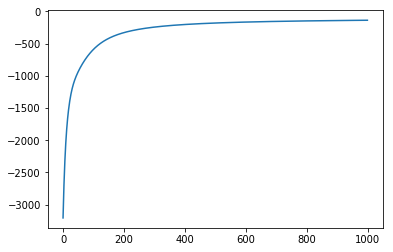

In [25]:
# Randomly initialize the weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

learning_rate = 10e-7
costs = []

for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0: # every 100 epoch we are going to calculate the costs
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("Cost = {0} and classification rate is {1}".format(c, r))
        costs.append(c)
        
    # Now doing gradient ascend
    # +ve instead of negative : t-y instead of y-t
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output,  W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)
    
plt.plot(costs)
plt.show()